# Исследование объявлений о продаже квартир

**Дано**: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Задача**: провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 

**Результаты исследования** позволят построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.\
Например, расстояние до центра, аэропорта и других объектов, количество парков и водоёмов — эти данные автоматически получены из геосервисов.

<hr>

### Обзор данных

**Импортируем библиотеки и прочитаем данные из папки `github` репозитория.**

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# чтение файла
df = pd.read_csv('https://raw.githubusercontent.com/SweexFox/portfolio-projects/main/python-projects/3-flat-sales-advertisements/real_estate_data.csv', sep='\t')

**Выведем первые 20 строк.**

In [3]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Одна строка обозначает одно объявление о продаже квартиры.

<br>

**Изучим сводную информацию о таблице.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Имеем `22` колонки и `23.699` строк. В большинстве из них видны пропуски.**

**Описание колонок:**

* `total_images` — число фотографий квартиры в объявлении;
* `last_price` — цена на момент снятия с публикации;
* `total_area` — общая площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` — дата публикации;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков (м);
* `floors_total` — всего этажей в доме;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `floor` — этаж;
* `is_apartment` — апартаменты (булев тип);
* `studio` — квартира-студия (булев тип);
* `open_plan` — свободная планировка (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `balcony` — число балконов;
* `locality_name` — название населённого пункта; 
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest`— расстояние до центра города (м);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

**В датафрейме есть неправильные типы данных:**
1. Цена квартиры (`last_price`)
2. Дата (`first_day_exposition`)
3. Общее количество этажей (`floors_total`)
4. Апартаменты ли? (`is_apartment`)
5. Общее количество балконов (`balcony`)
6. Парки в радиусе 3 км (`parks_around3000`)
7. Пруды в радиусе 3 км (`ponds_around3000`)
8. Сколько дней было размещено объявление (`days_exposition`)

**Выведем статистическое описание числовых колонок.**

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Максимальные значения показывают много фантастических данных, например, 19 комнатные квартиры... Допустим, они существуют.
Но потолок высотой 100 метров? Нет, такого не может быть ни за какие деньги. Также высоты потолков в 1 метр не может быть.

**Построим общую гистограмму для всех числовых колонок таблицы.**

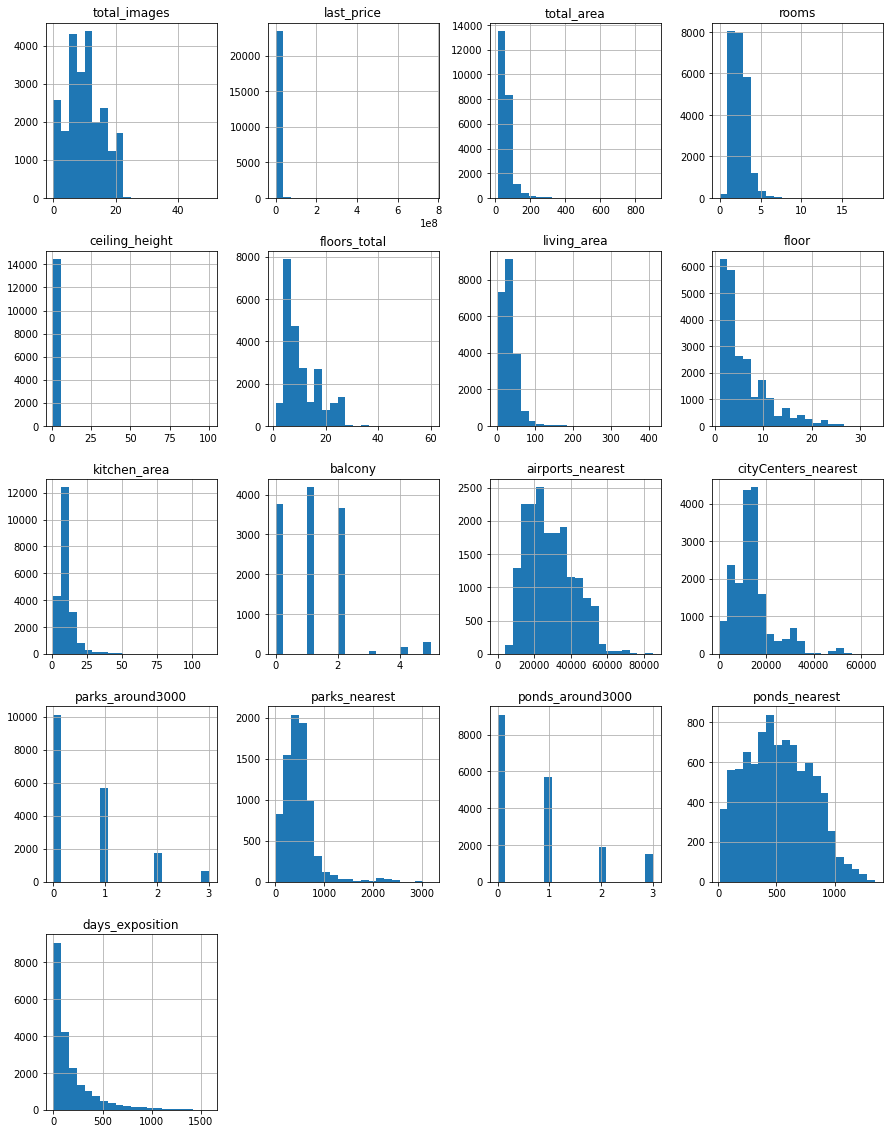

In [6]:
df.hist(bins=20, figsize=(15, 20))
plt.show()

Что означают оси на графиках:\
`ось X` — значение в рассматриваемой колонке\
`ось Y` — сколько раз это значение встречается в колонке\
Допустим, значение `20` в колонке `total_images` встречается `1694 раза`.\
Это значит, что 1694 объявлений имеют по 20 фотографий.\
Код снизу подтверждает этот факт.

In [7]:
df.query('total_images == 20')['total_images'].count()

1694

Предоставленные гистограммы дают лишь первый взгляд на данные, не более.

<hr>

### Предобработка данных

#### Пропущенные значения

**Определим, в каких колонках есть пропуски**

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Есть пропуски в:
1. `ceiling_height` - 9195 - высота потолков (м) 
2. `floors_total` - 86 - всего этажей в доме
3. `living_area` - 1903 - жилая площадь в квадратных метрах(м2)
4. `is_apartment` - 20924 - апартаменты (булев тип)
5. `kitchen_area` - 2278 - площадь кухни в квадратных метрах (м2)
6. `balcony` - 11519 - число балконов
7. `locality_name` - 49 - название населённого пункта
8. `airports_nearest` - 5542 - расстояние до ближайшего аэропорта в метрах (м)
9. `cityCenters_nearest` - 5519 - расстояние до центра города (м)
10. `parks_around3000` - 5518 - число парков в радиусе 3 км
11. `parks_nearest` - 15620 - расстояние до ближайшего парка (м)
12. `ponds_around3000` - 5518 - число парков в радиусе 3 км
13. `ponds_nearest` - 14589 - расстояние до ближайшего водоёма (м)
14. `days_exposition` - 3181 - сколько дней было размещено объявление (от публикации до снятия)

**Заполним пропущенные значения**

Мы не будем трогать пропуски в количестве этажей, высоте потолков, кухонной и жилой площадях. Не будем заниматься гаданием.\
Иначе это не будет отражать действительность, а лишь будут заполнения пропусокв ради заполнений пропусков.

Но мы можем рассчитать нежилую площадь там, где это возможно.\
Добавим новую колонну с нежилой площадью.\
Нежилая площадь – пространство, включающее коридор, кухню, санузел (ванную и туалет), балкон, лоджию. Сюда относятся кладовые, прихожие, гардеробные.

In [9]:
df['non_residential_area'] = df['total_area'] - df['living_area']

Выясним, сколько всего пропусков по площадям.

In [10]:
df[['total_area', 'kitchen_area', 'living_area', 'non_residential_area']].isna().sum()

total_area                 0
kitchen_area            2278
living_area             1903
non_residential_area    1903
dtype: int64

<br>

Заполним пропуски в балконах.\
Будем использовать заглушку в виде нуля (0). Т.е. там, где стояли пропуски, будет отображён нуль.

In [11]:
df['balcony'] = df['balcony'].fillna(0)

Заполним пропуски, является ли квартира аппартаментами.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)

<br>

Пропуски по различным объектам рядом с квартирами тоже оставим без изменений.

Удалим строки, где в названии населённого пункта есть пропуск. Где находится квартира-то?\
Благо, таких строк всего 49, они не повлияют на статистику.

In [13]:
df = df.dropna(subset=['locality_name'])

<br>

#### Типы данных колонок

Напомним колонки, в которых нужно изменить тип данных на правильный:
1. Цена квартиры (`last_price`)
2. Дата публикации (`first_day_exposition`)
3. Общее количество этажей (`floors_total`)
4. Общее количество балконов (`balcony`)
5. Парки в радиусе 3 км (`parks_around3000`)
6. Пруды в радиусе 3 км (`ponds_around3000`)
7. Сколько дней было размещено объявление (`days_exposition`)

Отобразим типы данных колонок.

In [14]:
df[['last_price', 'first_day_exposition', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].dtypes

last_price              float64
first_day_exposition     object
floors_total            float64
balcony                 float64
parks_around3000        float64
ponds_around3000        float64
days_exposition         float64
dtype: object

Преобразуем тип данных в выбранных колонках.

In [15]:
# цена квартиры
df['last_price'] = df['last_price'].astype('int')

In [16]:
df.shape

(23650, 23)

In [17]:
# дата публикации
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
df.shape

(23650, 23)

In [19]:
# общее количество этажей
df['floors_total'] = df['floors_total'].astype('Int64')

In [20]:
df.shape

(23650, 23)

In [21]:
# общее количество балконов
df['balcony'] = df['balcony'].astype('Int64')

In [22]:
df.shape

(23650, 23)

In [23]:
# парки в радиусе 3 км
df['parks_around3000'] = df['parks_around3000'].astype('Int64')

In [24]:
df.shape

(23650, 23)

In [25]:
# парки в радиусе 3 км
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')

In [26]:
df.shape

(23650, 23)

In [27]:
# сколько дней было размещено объявление
df['days_exposition'] = df['days_exposition'].round().astype('Int64')

In [28]:
df.shape

(23650, 23)

Проверим, поменялся ли тип данных.

In [29]:
df[['last_price', 'first_day_exposition', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].dtypes

last_price                       int32
first_day_exposition    datetime64[ns]
floors_total                     Int64
balcony                          Int64
parks_around3000                 Int64
ponds_around3000                 Int64
days_exposition                  Int64
dtype: object

Поменяли тип данных в 7 колонках:
1. Дату сделали понятной для человека
2. Общему количеству этажей, балконам, паркам и прудам вокруг назначили тип данных int. Потому что странно считать два с половиной балкона.

<br>

#### Дубликаты

**Явные дубликаты**

Сначала посчитаем количество явных дубликатов.

In [30]:
df.duplicated().sum()

0

Полностью дублирующихся строк нет. Здесь предобработка не нужна. 

<br>

**Неявные дубликаты**

Колонка `locality_name` содержит населённый пункт, где находится квартира из объявления.\
Посмотрим, в каких населённых пунктах находятся эти квартиры.

In [31]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Сколько уникальных значений в колонке `locality_name`?

In [32]:
df['locality_name'].nunique()

364

Сколько объявлений содержит каждое из 364 названий населённых пунктов?

In [33]:
df['locality_name'].value_counts()

Санкт-Петербург                       15721
посёлок Мурино                          522
посёлок Шушары                          440
Всеволожск                              398
Пушкин                                  369
                                      ...  
деревня Трубников Бор                     1
деревня Малая Романовка                   1
коттеджный поселок Кивеннапа Север        1
деревня Лаврики                           1
поселок Жилгородок                        1
Name: locality_name, Length: 364, dtype: int64

<br>

В глаза бросается буква `ё`, она создаёт неявные дубли.\
Заменим её везде на `е`.\
Уберём часть строк ` при железнодорожной` и превратим `городской поселок` в `поселок городского типа`.

In [34]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')

Посмотрим, сколько теперь уникальных населённых пунктов осталось.

In [35]:
df['locality_name'].nunique()

320

<br>

#### Аномальные значения

У нас в датасете есть квартиры с потолками более 10 метров и менее 2 метров. Посмотрим, сколько их.

In [36]:
df[df['ceiling_height'] >= 10]['ceiling_height'].count() + df.loc[df['ceiling_height'] < 2, 'ceiling_height'].count()

28

Их совсем немного.\
Предположим, что в квартирах с потолками 20 метров и выше была допущена опечатка, поделим такие потолки на 10, тогда данные будут выглядеть правдоподобно.

In [37]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] / 10

Также избавимся от строк, где потолки меньше двух метров и больше десяти метров.

In [38]:
df.drop(df[(df['ceiling_height'] < 2) | (df['ceiling_height'] >= 10)].index, inplace=True)

Проверим, удалились ли такие объявления.

In [39]:
if df[df['ceiling_height'] >= 10]['ceiling_height'].count() + df.loc[df['ceiling_height'] < 2, 'ceiling_height'].count() == 0:
    print('Объявления удалены')
else:
    print('Что-то не так')

Объявления удалены


<hr>

### Новые колонки

Добавим колонку с ценой одного квадратного метра.

In [40]:
df['one_meter_price'] = df['last_price'] / df['total_area']

<br>

Добавим колонку с днём недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [41]:
df['weekday'] = df['first_day_exposition'].dt.weekday

<br>

Добавим колонку с месяцем публикации объявления.

In [42]:
df['month'] = df['first_day_exposition'].dt.month

<br>

Добавим колонку с годом публикации объявления.

In [43]:
df['year'] = df['first_day_exposition'].dt.year

<br>

Добавим колонку с типом этажа квартиры (значения — «‎первый», «последний», «другой»);

In [44]:
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

Чтобы применить метод `apply` и создать новую колонку с типом этажа квартиры, нужно сначала избавиться от строк, где есть пропуски в `floors_total`. Таких квартирок всего `9`.

In [45]:
df = df.dropna(subset=['floors_total'])

In [46]:
# применим через атрибут loc, чтобы warning не ругался
df.loc[:, 'floor_type'] = df.apply(categorize_floor, axis=1)

<br>

Добавим колонку с расстоянием до центра города в километрах (переведём из `м` в `км` и округлим до целых значений).

In [47]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round()

<br>

Проверим наши новые колонки.

In [48]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'non_residential_area',
       'one_meter_price', 'weekday', 'month', 'year', 'floor_type',
       'cityCenters_nearest_km'],
      dtype='object')

Все на месте.

<hr>

### Исследовательский анализ данных

#### Гистограммы для каждого параметра

##### Гистограмма по общей площади

Средняя площадь квартиры: 60.3 м²
Медианная площадь квартиры: 52.0 м²


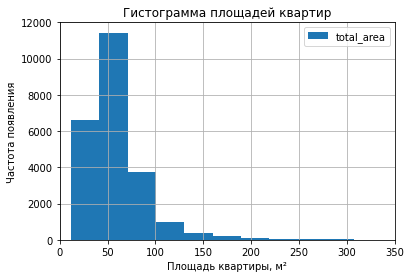

In [49]:
print(f"Средняя площадь квартиры: {df['total_area'].mean().round(1)} м²")
print(f"Медианная площадь квартиры: {df['total_area'].median().round(1)} м²")
df.plot(y='total_area',
        kind='hist',
        title='Гистограмма площадей квартир',
        grid=True,
        xlim=(0, 350),
        bins=30)
plt.xlabel('Площадь квартиры, м²')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

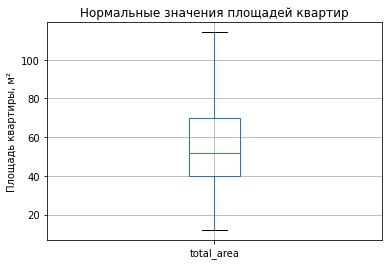

In [50]:
df.boxplot(column='total_area', showfliers=False)
plt.title('Нормальные значения площадей квартир')
plt.ylabel('Площадь квартиры, м²')
plt.show()

In [51]:
# межквартильный размах (IQR)
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м², что уже считается выбросами.')

Выше верхнего уса находятся значения выше 114.25 м², что уже считается выбросами.


In [52]:
normal_values = df[df['total_area'] <= upper_bound]['total_area'].count() - df[df['total_area'] >= upper_bound]['total_area'].count()
print('Количество квартир с "нормальной площадью": {0}'.format(normal_values))

Количество квартир с "нормальной площадью": 21081


In [53]:
print(f'Всего квартир:', df[df['total_area'] <= upper_bound]['total_area'].count())

Всего квартир: 22320


In [54]:
normal_percent = 100 - (df[df['total_area'] >= upper_bound]['total_area'].count() / df[df['total_area'] <= upper_bound]['total_area'].count() * 100).round(1)

In [55]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют площадь равную или меньше {upper_bound} м², что в пределах нормы.')

Итог: 94.4% квартир (21081 объявлений) имеют площадь равную или меньше 114.25 м², что в пределах нормы.


<br>

##### Гистограмма по жилой площади

Средняя жилая площадь квартиры: 34.5 м²
Медианная жилая площадь квартиры: 30.0 м²


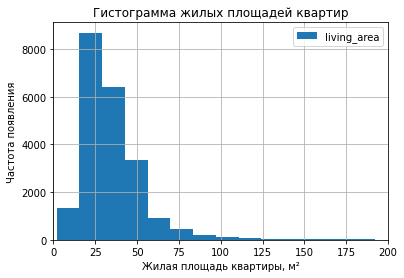

In [56]:
print(f"Средняя жилая площадь квартиры: {df['living_area'].mean().round(1)} м²")
print(f"Медианная жилая площадь квартиры: {df['living_area'].median().round(1)} м²")
df.plot(y='living_area',
        kind='hist',
        title='Гистограмма жилых площадей квартир',
        grid=True,
        xlim=(0, 200),
        bins=30)
plt.xlabel('Жилая площадь квартиры, м²')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

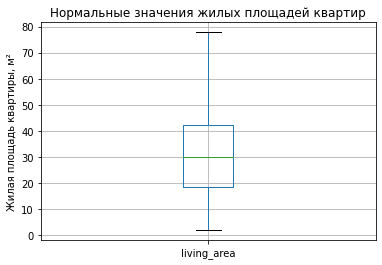

In [57]:
df.boxplot(column='living_area', showfliers=False)
plt.title('Нормальные значения жилых площадей квартир')
plt.ylabel('Жилая площадь квартиры, м²')
plt.show()

In [58]:
# межквартильный размах (IQR)
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м², что уже считается выбросами.')

Выше верхнего уса находятся значения выше 77.85 м², что уже считается выбросами.


In [59]:
normal_values = df[df['living_area'] <= upper_bound]['living_area'].count() - df[df['living_area'] >= upper_bound]['living_area'].count()
normal_values

20154

In [60]:
normal_percent = 100 - (df[df['living_area'] >= upper_bound]['living_area'].count() / df[df['living_area'] <= upper_bound]['living_area'].count() * 100).round(1)
normal_percent

96.3

In [61]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют жилую площадь равную или меньше {upper_bound} м², что является в пределах нормы.')

Итог: 96.3% квартир (20154 объявлений) имеют жилую площадь равную или меньше 77.85 м², что является в пределах нормы.


<br>

##### Гистограмма по площади кухни

Средняя площадь кухни квартиры: 10.6 м²
Медианная площадь кухни квартиры: 9.1 м²


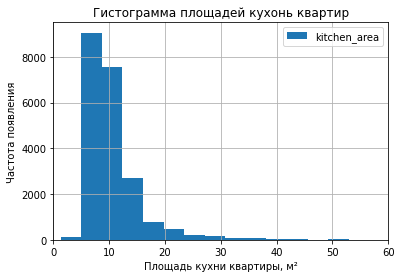

In [62]:
print(f"Средняя площадь кухни квартиры: {df['kitchen_area'].mean().round(1)} м²")
print(f"Медианная площадь кухни квартиры: {df['kitchen_area'].median().round(1)} м²")
df.plot(y='kitchen_area',
        kind='hist',
        title='Гистограмма площадей кухонь квартир',
        grid=True,
        xlim=(0, 60),
        bins=30)
plt.xlabel('Площадь кухни квартиры, м²')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

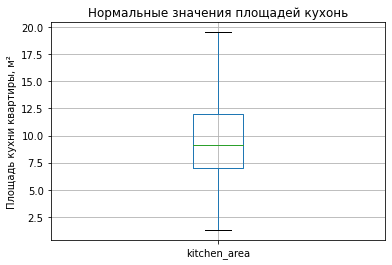

In [63]:
df.boxplot(column='kitchen_area', showfliers=False)
plt.title('Нормальные значения площадей кухонь')
plt.ylabel('Площадь кухни квартиры, м²')
plt.show()

In [64]:
# межквартильный размах (IQR)
Q1 = df['kitchen_area'].quantile(0.25)
Q3 = df['kitchen_area'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м², что уже считается выбросами.')

Выше верхнего уса находятся значения выше 19.5 м², что уже считается выбросами.


In [65]:
normal_values = df[df['kitchen_area'] <= upper_bound]['kitchen_area'].count() - df[df['kitchen_area'] > upper_bound]['kitchen_area'].count()
print('Количество объявлений с нормальным значением площади кухни:', normal_values)

Количество объявлений с нормальным значением площади кухни: 18974


In [66]:
normal_percent = 100 - (df[df['kitchen_area'] > upper_bound]['kitchen_area'].count() / df[df['kitchen_area'] <= upper_bound]['kitchen_area'].count() * 100).round(1)
print('Процент объявлений с нормальным значением площади кухни:', normal_percent,)

Процент объявлений с нормальным значением площади кухни: 94.1


In [67]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют площадь кухни равную или меньше {upper_bound} м², что является в пределах нормы.')

Итог: 94.1% квартир (18974 объявлений) имеют площадь кухни равную или меньше 19.5 м², что является в пределах нормы.


<br>

##### Гистограмма по цене объекта

Средняя стоимость квартиры: 6540132 ₽
Медианная стоимость квартиры: 4646000 ₽


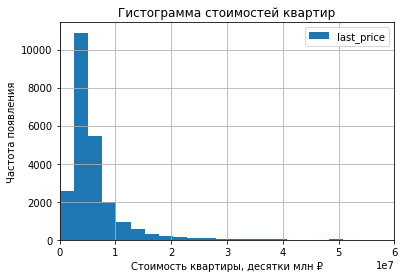

In [68]:
print(f"Средняя стоимость квартиры: {int(df['last_price'].mean().round())} ₽")
print(f"Медианная стоимость квартиры: {int(df['last_price'].median().round())} ₽")
df.plot(y='last_price',
        kind='hist',
        title='Гистограмма стоимостей квартир',
        grid=True,
        xlim=(0, 60000000),
        bins=300)
plt.xlabel('Стоимость квартиры, десятки млн ₽')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

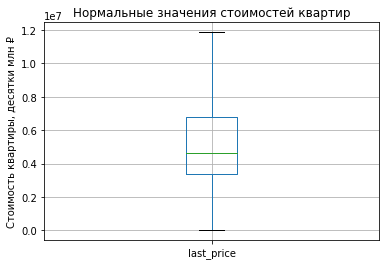

In [69]:
df.boxplot(column='last_price', showfliers=False)
plt.title('Нормальные значения стоимостей квартир')
plt.ylabel('Стоимость квартиры, десятки млн ₽')
plt.show()

In [70]:
# межквартильный размах (IQR)
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {int(upper_bound)} ₽, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 11875000 ₽, что уже считается выбросами.


In [71]:
normal_values = df[df['last_price'] <= upper_bound]['last_price'].count() - df[df['last_price'] > upper_bound]['last_price'].count()
print('Количество объявлений с нормальным значением стоимости квартиры:', normal_values)

Количество объявлений с нормальным значением стоимости квартиры: 19469


In [72]:
normal_percent = 100 - (df[df['last_price'] > upper_bound]['last_price'].count() / df[df['last_price'] <= upper_bound]['last_price'].count() * 100).round(1)
print('Процент объявлений с нормальным значением стоимости квартиры:', normal_percent,)

Процент объявлений с нормальным значением стоимости квартиры: 90.5


In [73]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют стоимость квартиры равную или меньше {upper_bound} ₽, что является в пределах нормы.')

Итог: 90.5% квартир (19469 объявлений) имеют стоимость квартиры равную или меньше 11875000.0 ₽, что является в пределах нормы.


<br>

##### Гистограмма по количеству комнат

Среднее количество комнат: 2
Медианное количество комнат: 2


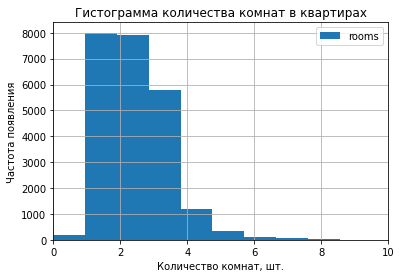

In [74]:
print(f"Среднее количество комнат: {int(df['rooms'].mean())}")
print(f"Медианное количество комнат: {int(df['rooms'].median())}")
df.plot(y='rooms',
        kind='hist',
        title='Гистограмма количества комнат в квартирах',
        grid=True,
        xlim=(0, 10),
        bins=20)
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

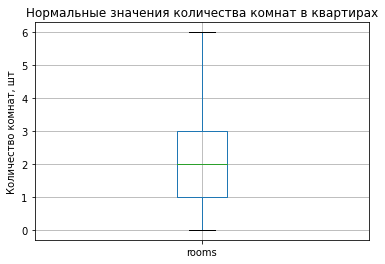

In [75]:
df.boxplot(column='rooms', showfliers=False)
plt.title('Нормальные значения количества комнат в квартирах')
plt.ylabel('Количество комнат, шт')
plt.show()

In [76]:
# межквартильный размах (IQR)
Q1 = df['rooms'].quantile(0.25)
Q3 = df['rooms'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {int(upper_bound)}, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 6, что уже считается выбросами.


In [77]:
normal_values = df[df['rooms'] <= upper_bound]['rooms'].count() - df[df['rooms'] > upper_bound]['rooms'].count()
print('Количество объявлений с нормальным значением количества комнат:', normal_values)

Количество объявлений с нормальным значением количества комнат: 23379


In [78]:
normal_percent = 100 - (df[df['rooms'] > upper_bound]['rooms'].count() / df[df['rooms'] <= upper_bound]['rooms'].count() * 100).round(1)
print('Процент объявлений с нормальным значением количества комнат:', normal_percent,)

Процент объявлений с нормальным значением количества комнат: 99.6


In [79]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют количество комнат равное или меньше {int(upper_bound)}, что является в пределах нормы.')

Итог: 99.6% квартир (23379 объявлений) имеют количество комнат равное или меньше 6, что является в пределах нормы.


<br>

##### Гистограмма по высоте потолков

Средняя высота потолков: 2.7 м
Медианная высота потолков: 2.6 м


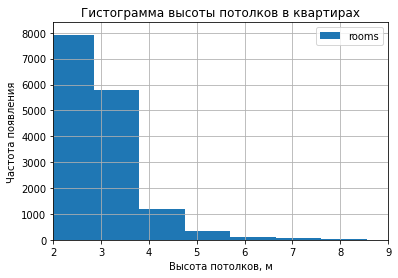

In [80]:
print(f"Средняя высота потолков: {df['ceiling_height'].mean().round(1)} м")
print(f"Медианная высота потолков: {df['ceiling_height'].median().round(1)} м")
df.plot(y='rooms',
        kind='hist',
        title='Гистограмма высоты потолков в квартирах',
        grid=True,
        xlim=(2, 9),
        bins=20)
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

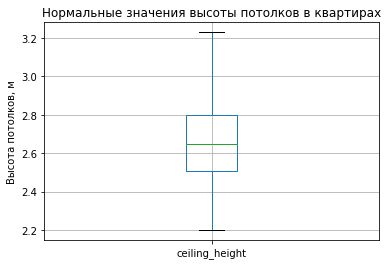

In [81]:
df.boxplot(column='ceiling_height', showfliers=False)
plt.title('Нормальные значения высоты потолков в квартирах')
plt.ylabel('Высота потолков, м')
plt.show()

In [82]:
# межквартильный размах (IQR)
Q1 = df['ceiling_height'].quantile(0.25)
Q3 = df['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound}, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 3.235, что уже считается выбросами.


In [83]:
normal_values = df[df['ceiling_height'] <= upper_bound]['ceiling_height'].count() - df[df['ceiling_height'] > upper_bound]['ceiling_height'].count()
print('Количество объявлений с нормальным значением высоты потолков:', normal_values)

Количество объявлений с нормальным значением высоты потолков: 12915


In [84]:
normal_percent = 100 - (df[df['ceiling_height'] > upper_bound]['ceiling_height'].count() / df[df['ceiling_height'] <= upper_bound]['ceiling_height'].count() * 100).round(1)
print('Процент объявлений с нормальным значением высоты потолков:', normal_percent,)

Процент объявлений с нормальным значением высоты потолков: 94.3


In [85]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют высоту потолков равную или меньше {upper_bound}, что является в пределах нормы.')

Итог: 94.3% квартир (12915 объявлений) имеют высоту потолков равную или меньше 3.235, что является в пределах нормы.


<br>

##### Столбчатая диаграмма по типу этажа квартиры

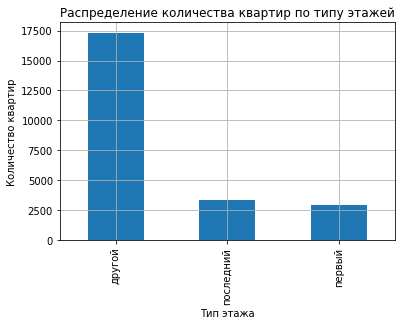

In [86]:
(df['floor_type'].value_counts()
                 .plot(kind='bar',
                       title='Распределение количества квартир по типу этажей',
                       grid=True))
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

In [87]:
df['floor_type'].value_counts()

другой       17322
последний     3329
первый        2908
Name: floor_type, dtype: int64

2908 квартир на первом этаже.\
3329 квартир — на последнем этаже.\
Остальные 17322 квартиры на других этажах.

<br>

##### Гистограмма по общему количеству этажей в доме

Среднее количество этажей в доме: 11.0
Медианное количество этажей в доме: 9.0


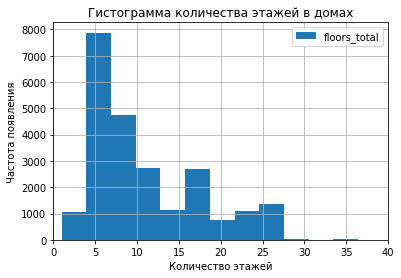

In [88]:
print(f"Среднее количество этажей в доме: {df['floors_total'].mean().round()}")
print(f"Медианное количество этажей в доме: {df['floors_total'].median().round()}")
df.plot(y='floors_total',
        kind='hist',
        title='Гистограмма количества этажей в домах',
        grid=True,
        xlim=(0, 40),
        bins=20)
plt.xlabel('Количество этажей')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

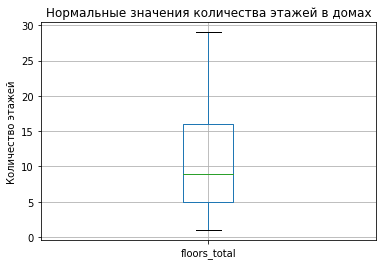

In [89]:
df.boxplot(column='floors_total', showfliers=False)
plt.title('Нормальные значения количества этажей в домах')
plt.ylabel('Количество этажей')
plt.show()

In [90]:
# межквартильный размах (IQR)
Q1 = df['floors_total'].quantile(0.25)
Q3 = df['floors_total'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound}, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 32.5, что уже считается выбросами.


In [91]:
normal_values = df[df['floors_total'] <= upper_bound]['floors_total'].count() - df[df['floors_total'] > upper_bound]['floors_total'].count()
print('Количество объявлений с нормальным значением количества этажей:', normal_values)

Количество объявлений с нормальным значением количества этажей: 23497


In [92]:
normal_percent = 100 - (df[df['floors_total'] > upper_bound]['floors_total'].count() / df[df['floors_total'] <= upper_bound]['floors_total'].count() * 100).round(1)
print('Процент объявлений с нормальным значением количества этажей:', normal_percent)

Процент объявлений с нормальным значением количества этажей: 99.9


In [93]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) находятся в домах этажностью равной или меньше {upper_bound}, что является в пределах нормы.')

Итог: 99.9% квартир (23497 объявлений) находятся в домах этажностью равной или меньше 32.5, что является в пределах нормы.


<br>

##### Гистограмма по расстоянию до центра города в метрах


Среднее расстояние до центра города: 14192.8
Медианное расстояние до центра города: 13095.0


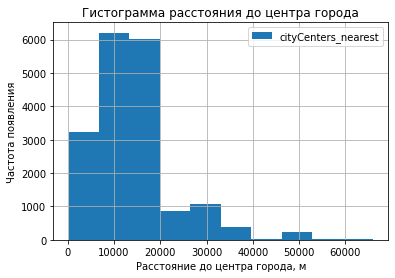

In [94]:
print(f"Среднее расстояние до центра города: {df['cityCenters_nearest'].mean().round(1)}")
print(f"Медианное расстояние до центра города: {df['cityCenters_nearest'].median().round(1)}")
df.plot(y='cityCenters_nearest',
        kind='hist',
        title='Гистограмма расстояния до центра города',
        grid=True)
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

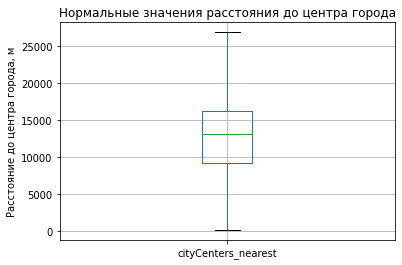

In [95]:
df.boxplot(column='cityCenters_nearest', showfliers=False)
plt.title('Нормальные значения расстояния до центра города')
plt.ylabel('Расстояние до центра города, м')
plt.show()

In [96]:
# межквартильный размах (IQR)
Q1 = df['cityCenters_nearest'].quantile(0.25)
Q3 = df['cityCenters_nearest'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 26855.5 м, что уже считается выбросами.


In [97]:
normal_values = df[df['cityCenters_nearest'] <= upper_bound]['cityCenters_nearest'].count() - df[df['cityCenters_nearest'] > upper_bound]['cityCenters_nearest'].count()
print('Количество объявлений с нормальным значением расстояния до центра города:', normal_values)

Количество объявлений с нормальным значением расстояния до центра города: 14615


In [98]:
normal_percent = 100 - (df[df['cityCenters_nearest'] > upper_bound]['cityCenters_nearest'].count() / df[df['cityCenters_nearest'] <= upper_bound]['cityCenters_nearest'].count() * 100).round(1)
print('Процент объявлений с нормальным значением расстояния до центра города:', normal_percent)

Процент объявлений с нормальным значением расстояния до центра города: 89.5


In [99]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют расстояние до центра города равное или меньше {upper_bound} м, что является в пределах нормы.')

Итог: 89.5% квартир (14615 объявлений) имеют расстояние до центра города равное или меньше 26855.5 м, что является в пределах нормы.


<br>

##### Гистограмма по расстоянию до ближайшего аэропорта

Среднее расстояние до ближайшего аэропорта : 28797.4 м
Медианное расстояние до ближайшего аэропорта : 26756.5 м


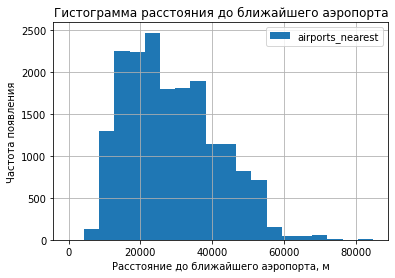

In [100]:
print(f"Среднее расстояние до ближайшего аэропорта : {df['airports_nearest'].mean().round(1)} м")
print(f"Медианное расстояние до ближайшего аэропорта : {df['airports_nearest'].median().round(1)} м")
df.plot(y='airports_nearest',
        kind='hist',
        title='Гистограмма расстояния до ближайшего аэропорта',
        grid=True,
        bins=20)
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

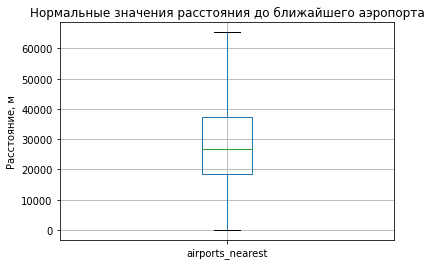

In [101]:
df.boxplot(column='airports_nearest', showfliers=False)
plt.title('Нормальные значения расстояния до ближайшего аэропорта')
plt.ylabel('Расстояние, м')
plt.show()

In [102]:
# межквартильный размах (IQR)
Q1 = df['airports_nearest'].quantile(0.25)
Q3 = df['airports_nearest'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 65339.25 м, что уже считается выбросами.


In [103]:
normal_values = df[df['airports_nearest'] <= upper_bound]['airports_nearest'].count() - df[df['airports_nearest'] > upper_bound]['airports_nearest'].count()
print('Количество объявлений с нормальным значением расстояния до центра города:', normal_values)

Количество объявлений с нормальным значением расстояния до центра города: 17836


In [104]:
normal_percent = 100 - (df[df['airports_nearest'] > upper_bound]['airports_nearest'].count() / df[df['airports_nearest'] <= upper_bound]['airports_nearest'].count() * 100).round(1)
print('Процент объявлений с нормальным значением расстояния до центра города:', normal_percent)

Процент объявлений с нормальным значением расстояния до центра города: 99.4


In [105]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют расстояние до ближайшего аэропорта равное или меньше {upper_bound} м, что является в пределах нормы.')

Итог: 99.4% квартир (17836 объявлений) имеют расстояние до ближайшего аэропорта равное или меньше 65339.25 м, что является в пределах нормы.


<br>

##### Гистограмма по расстоянию до ближайшего парка

Среднее расстояние до ближайшего парка: 490.6 м
Медианное расстояние до ближайшего парка: 455.0 м


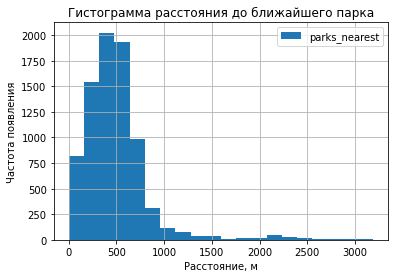

In [106]:
print(f"Среднее расстояние до ближайшего парка: {df['parks_nearest'].mean().round(1)} м")
print(f"Медианное расстояние до ближайшего парка: {df['parks_nearest'].median().round(1)} м")
df.plot(y='parks_nearest',
        kind='hist',
        title='Гистограмма расстояния до ближайшего парка',
        grid=True,
        bins=20)
plt.xlabel('Расстояние, м')
plt.ylabel('Частота появления')
plt.show()

Построим диаграмму размаха.

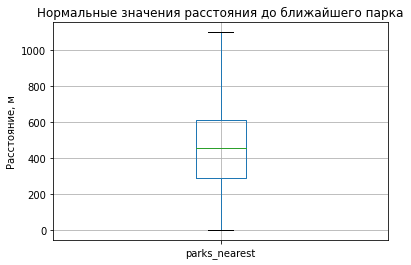

In [107]:
df.boxplot(column='parks_nearest', showfliers=False)
plt.title('Нормальные значения расстояния до ближайшего парка')
plt.ylabel('Расстояние, м')
plt.show()

In [108]:
# межквартильный размах (IQR)
Q1 = df['parks_nearest'].quantile(0.25)
Q3 = df['parks_nearest'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} м, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 1098.0 м, что уже считается выбросами.


In [109]:
normal_values = df[df['parks_nearest'] <= upper_bound]['parks_nearest'].count() - df[df['parks_nearest'] > upper_bound]['parks_nearest'].count()
print('Количество объявлений с нормальным значением расстояния до ближайшего парка:', normal_values)

Количество объявлений с нормальным значением расстояния до ближайшего парка: 7405


In [110]:
normal_percent = 100 - (df[df['parks_nearest'] > upper_bound]['parks_nearest'].count() / df[df['parks_nearest'] <= upper_bound]['parks_nearest'].count() * 100).round(1)
print('Процент объявлений с нормальным значением расстояния до ближайшего парка:', normal_percent)

Процент объявлений с нормальным значением расстояния до ближайшего парка: 96.0


In [111]:
print(f'Итог: {normal_percent}% квартир ({normal_values} объявлений) имеют расстояние до ближайшего парка равное или меньше {upper_bound} м, что является в пределах нормы.')

Итог: 96.0% квартир (7405 объявлений) имеют расстояние до ближайшего парка равное или меньше 1098.0 м, что является в пределах нормы.


10000 квартир находятся в полукилометре ходьбы до парка

##### Гистограмма по дню и месяцу публикации объявления


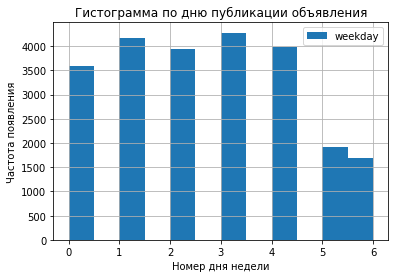

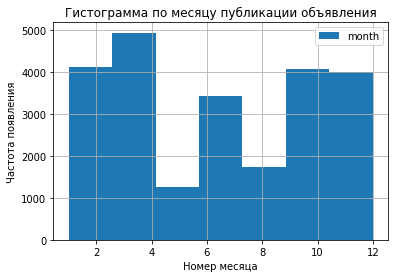

In [112]:
df.plot(y='weekday',
        kind='hist',
        title='Гистограмма по дню публикации объявления',
        grid=True,
        bins=12)
plt.xlabel('Номер дня недели')
plt.ylabel('Частота появления')
plt.show()

df.plot(y='month',
        kind='hist',
        title='Гистограмма по месяцу публикации объявления',
        grid=True,
        bins=7)
plt.xlabel('Номер месяца')
plt.ylabel('Частота появления')
plt.show()

Объявления в основном публикуют в будние дни. В первые числа января практически не публикуют, а после февраля активно публикуют объявления. В майские праздники заметно меньше публикуют объявления.

<br>

#### Как быстро продавались квартиры

Изучим, как быстро продавались квартиры (колонка days_exposition).\
Этот параметр показывает, сколько дней было размещено каждое объявление.

Построим гистограмму.

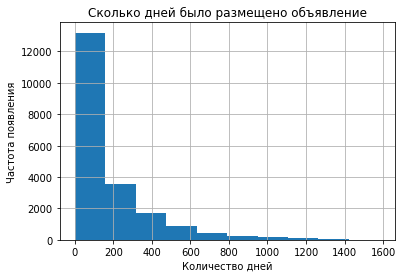

In [113]:
df['days_exposition'].hist()
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Частота появления')
plt.show()

Посчитаем среднее и медиану.

In [114]:
print(f"Среднее время продажи квартиры: {int(df['days_exposition'].mean().round(1))}")
print(f"Медианное время продажи квартиры: {int(df['days_exposition'].median().round(1))}")

Среднее время продажи квартиры: 180
Медианное время продажи квартиры: 95


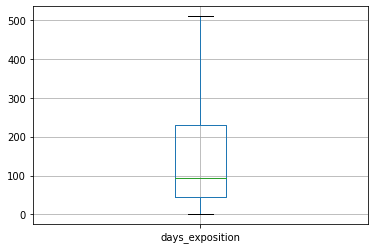

In [115]:
df.boxplot(column='days_exposition', showfliers=False)
plt.show()

In [116]:
# межквартильный размах (IQR)
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
# верхняя и нижняя границы нормальных значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выше верхнего уса находятся значения выше {upper_bound} дней, что уже считается выбросами.')

Выше верхнего уса находятся значения выше 510.0 дней, что уже считается выбросами.


Судя по гистограмме, подавляющее большинство квартир продавались за 180 дней. На это указывает и средний показатель.\
А медиана гласит, что половина квартир продавалась быстрее чем за 95 дней, а другая половина продавалась дольше 95 дней.

Построив диаграмму размаха, можно выделить следующее:
1. Быстрыми можно считать продажи таких квартир, которые продали за 45 дней и быстрее. Такие продажи ниже первого квартиля. Быстрые продажи составляют от 25% всех объявлений и ниже.
2. Долгими можно считать продажи квартир, которые продавались за 232 дня и дольше, то есть долгие продажи относятся к области выше третьего квартиля.
3. Необычайно долгими же можно считать объявления, которые находятся за пределами верхнего уса, это выбросы. В них включены объявления, которые были опубликованными в течение 511 дней и дольше.

<br>

#### Какие факторы больше всего влияют на общую стоимость квартиры

##### Зависимость цены от площади квартиры

In [117]:
# сводная таблица
total_price_to_square = (df.groupby('total_area')['last_price']
                           .agg(['count', 'mean', 'median'])
                           .reset_index())
total_price_to_square.columns=('Площадь', 'Кол-во квартир', 'Средняя цена', 'Медианная цена')

In [118]:
total_price_to_square.sort_values(by='Кол-во квартир', ascending=False)

,Площадь,Кол-во квартир,Средняя цена,Медианная цена
596,45.00,418,4.033086e+06,4000000.0
521,42.00,383,3.849210e+06,3850000.0
174,31.00,346,2.896410e+06,3050000.0
913,60.00,346,5.601473e+06,5200000.0
572,44.00,343,3.643822e+06,3800000.0
...,...,...,...,...
845,56.79,1,8.000000e+06,8000000.0
841,56.51,1,4.300000e+06,4300000.0
839,56.49,1,5.400000e+06,5400000.0
837,56.32,1,4.950000e+06,4950000.0


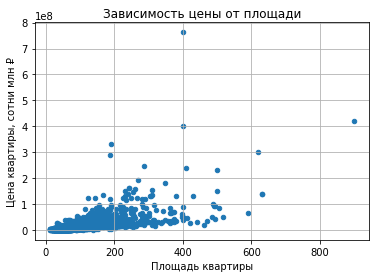

In [119]:
df.plot(x='total_area',
        y='last_price',
        kind='scatter',
        grid=True)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()

In [120]:
print(f"Коэффициент корреляции Пирсона равен: {df['total_area'].corr(df['last_price']).round(2)}")

Коэффициент корреляции Пирсона равен: 0.65


Это значит, что цена скорее зависит от общей площади. Положительная корреляция.

<br>

##### Зависимость цены от площади кухни

In [121]:
# сводная таблица
total_price_to_kitchen = (df.pivot_table(index='kitchen_area', values='last_price', aggfunc=['count', 'mean', 'median'])
                            .reset_index())
total_price_to_kitchen.columns=('Площадь кухни', 'Кол-во квартир', 'Средняя цена', 'Медианная цена')

In [122]:
total_price_to_kitchen.sort_values(by='Кол-во квартир', ascending=False)

,Площадь кухни,Кол-во квартир,Средняя цена,Медианная цена
61,6.00,1298,3.342867e+06,3300000.0
269,10.00,1258,5.757964e+06,4800000.0
140,8.00,1108,4.737586e+06,4300000.0
201,9.00,1099,4.716032e+06,4100000.0
104,7.00,1062,4.164473e+06,4000000.0
...,...,...,...,...
450,12.71,1,2.450000e+06,2450000.0
451,12.72,1,8.090000e+06,8090000.0
452,12.75,1,4.296240e+06,4296240.0
456,12.84,1,6.200000e+06,6200000.0


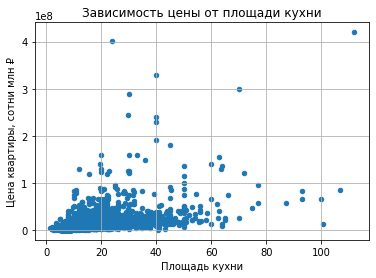

In [123]:
df.plot(x='kitchen_area',
        y='last_price',
        kind='scatter',
        grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()

In [124]:
print(f"Коэффициент корреляции Пирсона равен: {df['kitchen_area'].corr(df['last_price']).round(2)}")

Коэффициент корреляции Пирсона равен: 0.52


Цена скорее зависит от площади кухни, есть положительная корреляция.

<br>

##### Зависимость цены от количества комнат

In [125]:
# сводная таблица
total_price_to_rooms = (df.groupby('rooms')['last_price'].agg(['count', 'mean', 'median'])
                          .reset_index())
total_price_to_rooms.columns=('Кол-во комнат', 'Кол-во квартир', 'Средняя цена', 'Медианная цена')

In [126]:
total_price_to_rooms.sort_values(by='Кол-во квартир', ascending=False)

,Кол-во комнат,Кол-во квартир,Средняя цена,Медианная цена
1,1,8001,3.832257e+06,3600000
2,2,7894,5.587720e+06,4762338
3,3,5779,8.174764e+06,6200000
4,4,1172,1.341792e+07,9000000
5,5,325,2.379830e+07,14000000
0,0,194,3.344493e+06,2700000
6,6,104,3.188004e+07,19000000
7,7,59,5.147007e+07,24900000
8,8,12,5.022417e+07,23095000
9,9,8,3.415236e+07,23750000


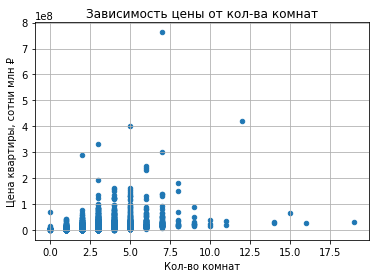

In [127]:
df.plot(x='rooms',
        y='last_price',
        kind='scatter',
        grid=True)
plt.title('Зависимость цены от кол-ва комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()

In [128]:
print(f"Коэффициент корреляции Пирсона равен: {df['rooms'].corr(df['last_price']).round(2)}")

Коэффициент корреляции Пирсона равен: 0.36


Есть положительная корреляция между количеством комнат и ценой квартиры.

<br>

##### Зависимость цены от этажа, на котором расположена квартира

In [129]:
# сводная таблица
total_price_to_floor_type = (df.pivot_table(index='floor_type', values='last_price', aggfunc=['count', 'mean', 'median'])
                               .reset_index())
total_price_to_floor_type.columns=('Тип этажа', 'Кол-во квартир', 'Средняя цена', 'Медианная цена')

In [130]:
total_price_to_floor_type.sort_values(by='Кол-во квартир', ascending=False)

,Тип этажа,Кол-во квартир,Средняя цена,Медианная цена
0,другой,17322,6.674678e+06,4846500
2,последний,3329,7.356843e+06,4300000
1,первый,2908,4.803740e+06,3900000


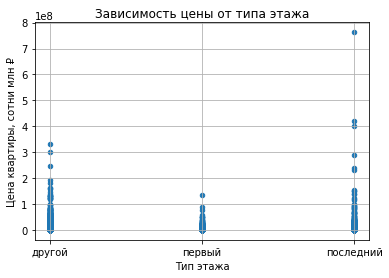

In [131]:
df.plot(x='floor_type',
        y='last_price',
        kind='scatter',
        grid=True)
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()

Квартиры на первом этаже обходятся дешевле, чем квартиры на других этажах

<br>

##### Зависимость цены от даты размещения (день недели, месяц, год)

In [132]:
total_price_to_date = (df.pivot_table(index=['weekday', 'month', 'year'], values='last_price', aggfunc=['count', 'mean', 'median'])
                         .reset_index())
total_price_to_date.columns=('Номер дня', 'Номер месяца', 'Год', 'Кол-во квартир', 'Средняя цена', 'Медианная цена')

In [133]:
total_price_to_date.sort_values(by='Кол-во квартир', ascending=False)

,Номер дня,Номер месяца,Год,Кол-во квартир,Средняя цена,Медианная цена
168,3,2,2018,519,6.008869e+06,4490000.0
262,4,11,2017,332,6.398762e+06,4525000.0
145,2,9,2017,228,6.446190e+06,4600000.0
153,2,11,2017,221,6.574170e+06,4650000.0
19,0,4,2019,218,6.953873e+06,5200000.0
...,...,...,...,...,...,...
293,5,6,2015,2,7.050000e+06,7050000.0
328,6,2,2015,1,1.050000e+07,10500000.0
323,6,1,2015,1,5.500000e+06,5500000.0
338,6,4,2015,1,6.195000e+06,6195000.0


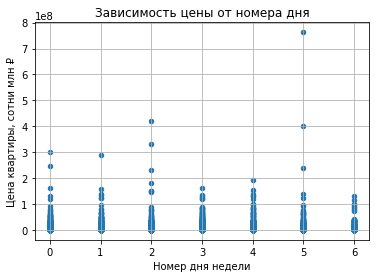

Коэффициент корреляции Пирсона равен: 0.001


In [134]:
df.plot(x='weekday', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от номера дня')
plt.xlabel('Номер дня недели')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()
print(f"Коэффициент корреляции Пирсона равен: {df['weekday'].corr(df['last_price']).round(3)}")

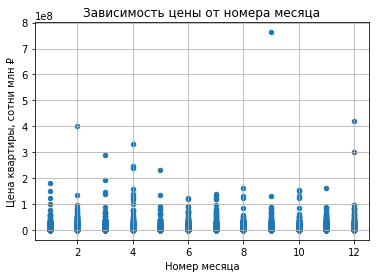

Коэффициент корреляции Пирсона равен: 0.003


In [135]:
df.plot(x='month', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от номера месяца')
plt.xlabel('Номер месяца')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()
print(f"Коэффициент корреляции Пирсона равен: {df['month'].corr(df['last_price']).round(3)}")

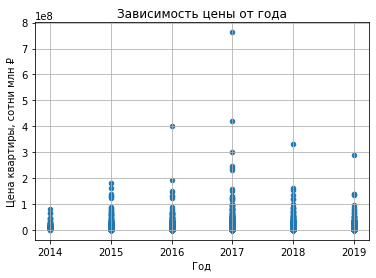

Коэффициент корреляции Пирсона равен: -0.043


In [136]:
df.plot(x='year', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()
print(f"Коэффициент корреляции Пирсона равен: {df['year'].corr(df['last_price']).round(3)}")

Корреляция между датой размещения и ценой квартиры совсем отсутствует

**Таким образом, на стоимость квартиры больше всего влияет общая площадь.**

<br>

#### Анализ по самым популярным населённым пунктам

**10 населённых пунктов с наибольшим числом объявлений**

In [137]:
top_10 = df['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      15646
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

**Средняя цена одного квадратного метра в этих 10 населённых пунктах**

In [138]:
city_av_price = (df.query('locality_name in @top_10.index')
                   .pivot_table(index='locality_name', values='one_meter_price', aggfunc='mean')
                   .reset_index())
city_av_price.columns=('Населённый пункт', 'Средняя цена 1 м²')
city_av_price.sort_values(by='Средняя цена 1 м²', ascending=False)

,Населённый пункт,Средняя цена 1 м²
5,Санкт-Петербург,114839.840202
4,Пушкин,103125.819291
6,деревня Кудрово,92473.547576
8,поселок Парголово,90175.913458
7,поселок Мурино,85629.568678
9,поселок Шушары,78551.344545
3,Колпино,75424.579098
2,Гатчина,68746.146763
0,Всеволожск,68654.473986
1,Выборг,58141.909153


**Населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [139]:
print(f'Самая высокая стоимость квадратного метра — в Петербурге.') 
city_av_price[city_av_price['Средняя цена 1 м²'] == city_av_price['Средняя цена 1 м²'].max()]

Самая высокая стоимость квадратного метра — в Петербурге.


,Населённый пункт,Средняя цена 1 м²
5,Санкт-Петербург,114839.840202


In [140]:
print(f'Самая низкая стоимость квадратного метра — в Выборге.') 
city_av_price[city_av_price['Средняя цена 1 м²'] == city_av_price['Средняя цена 1 м²'].min()]

Самая низкая стоимость квадратного метра — в Выборге.


,Населённый пункт,Средняя цена 1 м²
1,Выборг,58141.909153


<br>

#### Анализ квартир Санкт-Петербурга

Вычислим среднюю цену каждого километра.\
Опишем, как стоимость объектов зависит от расстояния до центра города.

Добавим в датафрейм новую колонку с средней ценой за каждый км

In [141]:
df['av_price_per_km'] = df['last_price'] / df['cityCenters_nearest_km']

In [142]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,non_residential_area,one_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km,av_price_per_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,<NA>,57.00,120370.370370,3,3,2019,другой,16.0,8.125000e+05
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81,21.80,82920.792079,1,12,2018,первый,19.0,1.763158e+05
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558,21.70,92785.714286,3,8,2015,другой,14.0,3.711429e+05
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424,NaN,408176.100629,4,7,2015,другой,7.0,9.271429e+06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,68.00,100000.000000,1,6,2018,другой,8.0,1.250000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,<NA>,60.51,72490.845228,1,3,2017,другой,4.0,2.425000e+06
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,NaN,45,21.00,52542.372881,0,1,2018,другой,NaN,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,False,...,NaN,<NA>,27.00,44091.710758,6,2,2018,первый,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,196.0,602,NaN,149511.400651,1,3,2017,другой,10.0,1.147500e+06


Выделим квартиры в Санкт-Петербурге

In [143]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,non_residential_area,one_meter_price,weekday,month,year,floor_type,cityCenters_nearest_km,av_price_per_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,<NA>,57.00,120370.370370,3,3,2019,другой,16.0,8.125000e+05
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558,21.70,92785.714286,3,8,2015,другой,14.0,3.711429e+05
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424,NaN,408176.100629,4,7,2015,другой,7.0,9.271429e+06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,68.00,100000.000000,1,6,2018,другой,8.0,1.250000e+06
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,NaN,<NA>,NaN,110544.692737,3,4,2019,другой,12.0,6.595833e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,652.0,29,19.00,100566.572238,2,2,2018,другой,16.0,2.218750e+05
23690,3,5500000,52.00,2018-07-19,2,NaN,5,31.0,2,False,...,NaN,15,21.00,105769.230769,3,7,2018,другой,6.0,9.166667e+05
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519,32.60,129903.978052,3,10,2016,другой,4.0,2.367500e+06
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,381.0,<NA>,60.51,72490.845228,1,3,2017,другой,4.0,2.425000e+06


Опишем, как стоимость объектов зависит от расстояния до центра города

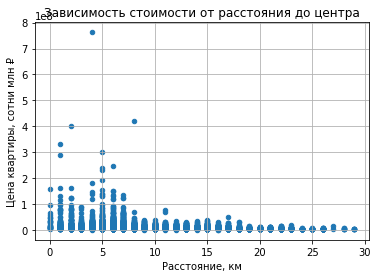

Коэффициент корреляции Пирсона равен: -0.26


In [144]:
spb.plot(x='cityCenters_nearest_km',
         y='last_price',
         kind='scatter',
         grid=True)
plt.title('Зависимость стоимости от расстояния до центра')
plt.xlabel('Расстояние, км')
plt.ylabel('Цена квартиры, сотни млн ₽')
plt.show()
print(f"Коэффициент корреляции Пирсона равен: {spb['cityCenters_nearest_km'].corr(spb['last_price']).round(2)}")

Чем ближе квартира к центру города, тем она дороже обходится

### Общий вывод

На конечную стоимость квартиры обратно пропорционально влияет:
1. Удалённость от центра города

На конечную стоимость квартиры прямо пропорционально влияет:
1. Общая площадь
2. Площадь кухни
3. Количество комнат

Самые популярные населённые пункты Ленинградской области (где больше всего объявлений):
1. Санкт-Петербург
2. посёлок Мурино
3. посёлок Шушары
4. Всеволожск
5. Пушкин
6. Колпино
7. посёлок Парголово
8. Гатчина
9. Деревня Кудрово
10. Выборг

Среди самых популярных населённых пунктов:\
самый дорогой квадратный метр — в Санкт-Петербурге;\
самый дешёвый квадратный метр — в Выборге.